In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("train.csv")

In [4]:
df = data.copy()

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\Kasote\AppData\Local\Temp\ipykernel_18112\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Kasote\AppData\Local\Temp\ipykernel_18112\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [10]:
df['Cabin'].fillna("Unknown", inplace=True)

C:\Users\Kasote\AppData\Local\Temp\ipykernel_18112\2437673229.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna("Unknown", inplace=True)


In [11]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,60,80],
                        labels=['Child','Teen','Adult','Senior'])


In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

<Axes: xlabel='Survived', ylabel='count'>

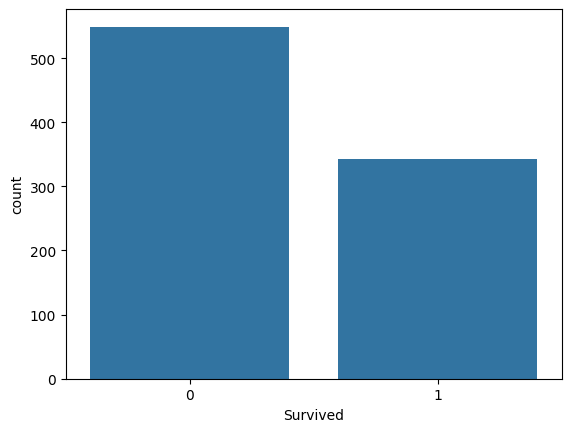

In [14]:
import seaborn as sns
df['Survived'].value_counts(normalize=True) * 100
sns.countplot(x='Survived', data=df)

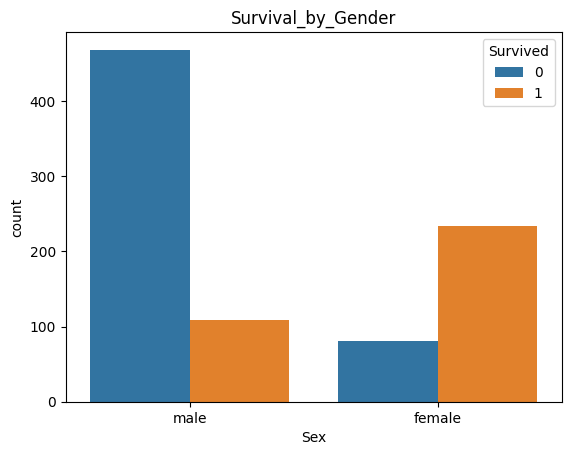

In [40]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival_by_Gender")
plt.savefig("Survival_by_gender.png", dpi=300, bbox_inches="tight")

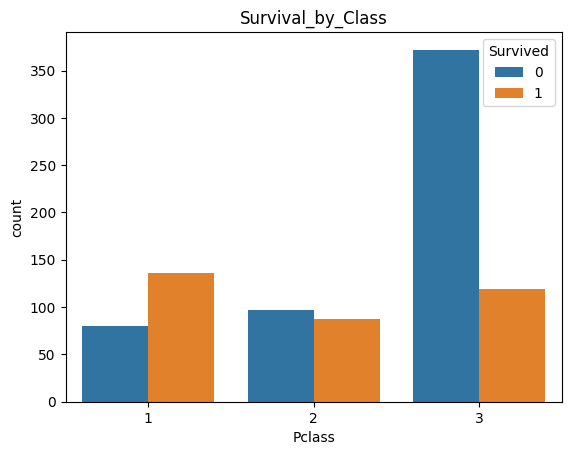

In [35]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival_by_Class")
plt.savefig("Survival_by_Class.png", dpi=300, bbox_inches="tight")

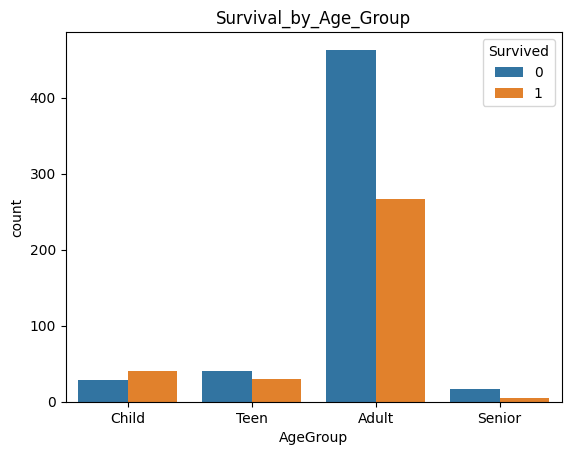

In [36]:
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title("Survival_by_Age_Group")
plt.savefig("Survival_by_Age_Group.png", dpi=300, bbox_inches="tight")

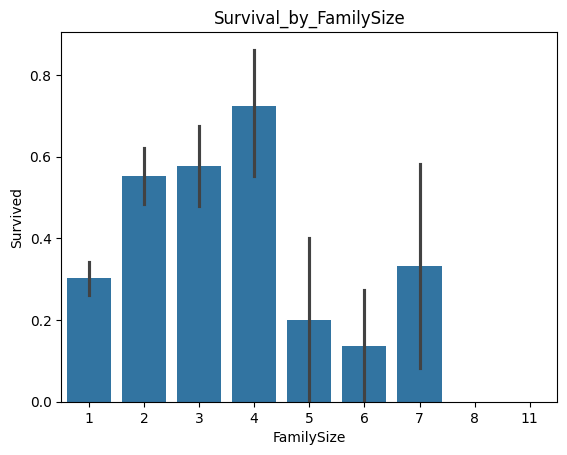

In [42]:
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival_by_FamilySize")
plt.savefig("Survival_by_FamilySize.png", dpi=300, bbox_inches="tight")

<Axes: >

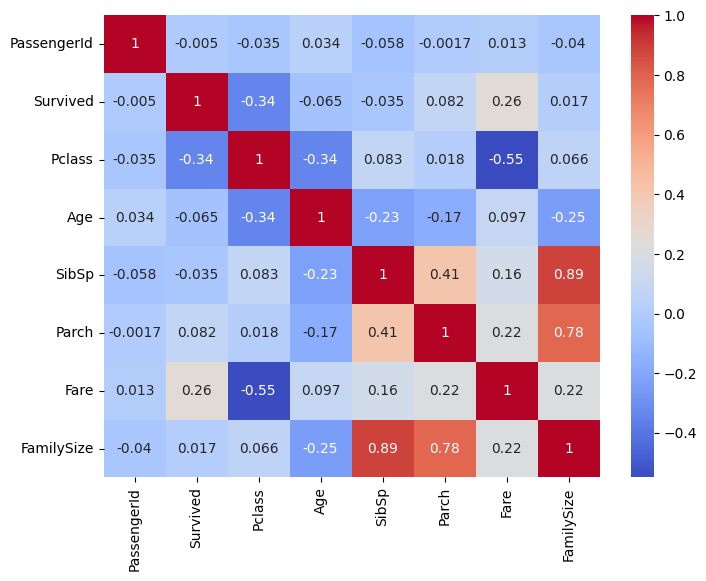

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [19]:
df.groupby('Sex')['Survived'].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

## Output Shows : Women survived more than men
#### Male: ~18% survived
#### Female: ~74% survived

In [22]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,60,80],
                        labels=['Child','Teen','Adult','Senior'])
df.groupby('AgeGroup')['Survived'].mean()

C:\Users\Kasote\AppData\Local\Temp\ipykernel_18112\1916341902.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Survived'].mean()


AgeGroup
Child     0.579710
Teen      0.428571
Adult     0.365753
Senior    0.227273
Name: Survived, dtype: float64

### Output Shows : Children had higher survival rates than adults , i.e., ~57% survived

In [26]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### Output Shows : 1st class passengers had much higher survival rates

In [27]:
df.groupby('FamilySize')['Survived'].mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

### Output Shows : Large families had lower survival chances

### Strong gender-based survival bias is revealed by analysis: approximately 74% of women survived while only approximately 18% of men did. This is in line with the rescue protocol that prioritizes women and children. In a similar vein, children—especially those under 12—had greater survival rates. Additionally, social class was a factor: first-class passengers had a survival rate of over 60%, while third-class passengers only had a survival rate of about 25%. It's interesting to note that family size also affected survival; individuals traveling alone and very large families had significantly lower survival rates, whereas medium-sized families fared better.